## Problem Statement: Customer Segmentation Analysis
**Description**:- <br> &emsp;&emsp;&emsp; You own the mall and want to understand the customers who can quickly
converge [Target Customers] so that the insight can be given to the
marketing team and plan the strategy accordingly.


#### Load Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


import warnings
warnings.filterwarnings('ignore')


#### 2. Load the dataset into the tool.

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### 3. Perform Below Visualizations.
* Univariate Analysis
* Bi-Variate Analysis
* Multi-Variate Analysis

<AxesSubplot:xlabel='Age', ylabel='Density'>

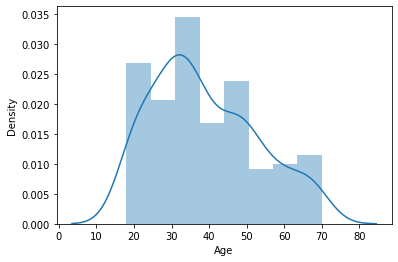

In [4]:
sns.distplot(df.Age)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

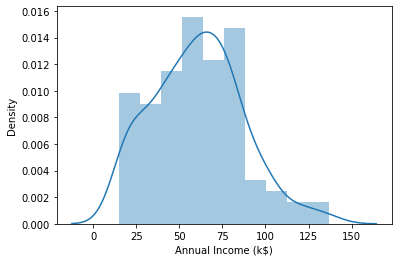

In [5]:
sns.distplot(df["Annual Income (k$)"])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

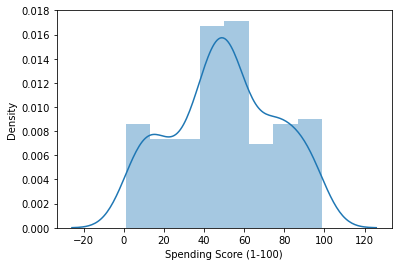

In [6]:
sns.distplot(df["Spending Score (1-100)"])

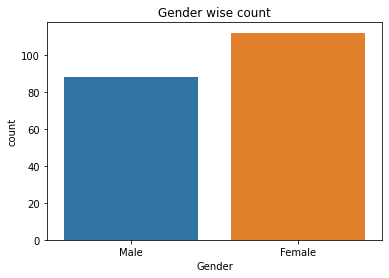

In [7]:
sns.countplot(x=df['Gender'])
plt.title('Gender wise count')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

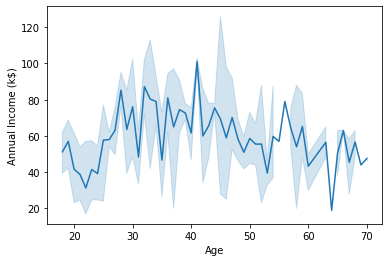

In [8]:
sns.lineplot(x=df.Age, y=df["Annual Income (k$)"])

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

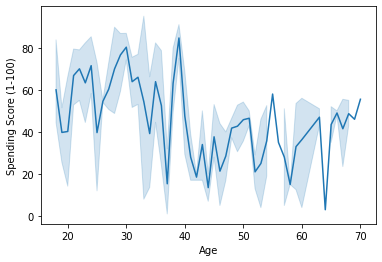

In [9]:
sns.lineplot(x=df.Age, y=df["Spending Score (1-100)"])

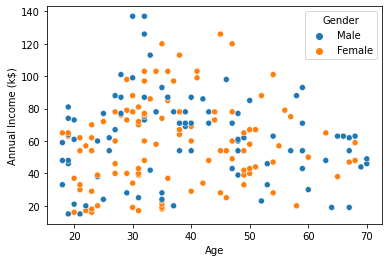

In [10]:
sns.scatterplot(x=df.Age, y=df["Annual Income (k$)"], hue=df.Gender)
plt.show()

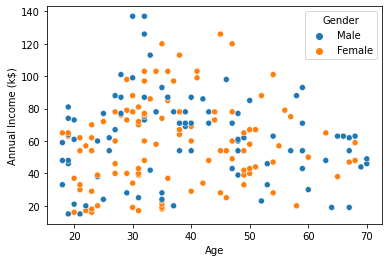

In [11]:
sns.scatterplot(x=df.Age, y=df["Annual Income (k$)"], hue=df.Gender)
plt.show()

<AxesSubplot:>

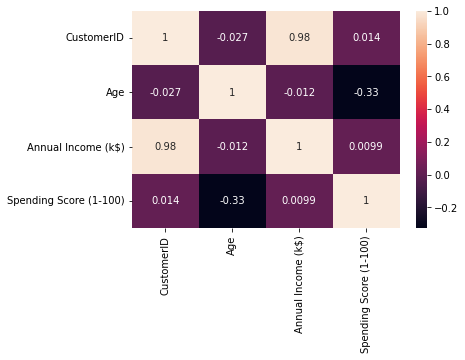

In [12]:
sns.heatmap(df.corr(), annot=True)

#### 4. Perform descriptive statistics on the dataset.

In [13]:
df.describe(percentiles=[.2, .3, .4, .5, .6, .7, .8, .9], include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
20%,40.800000,NaN,26.800000,37.800000,26.000000
30%,60.700000,NaN,30.000000,46.000000,40.000000
40%,80.600000,NaN,32.000000,54.000000,45.600000


#### 5. Check for Missing values and deal with them.

In [14]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### 6. Find the outliers and replace them outliers

In [15]:
df[df.duplicated()]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


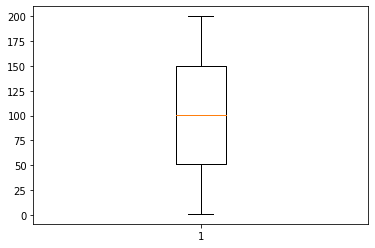

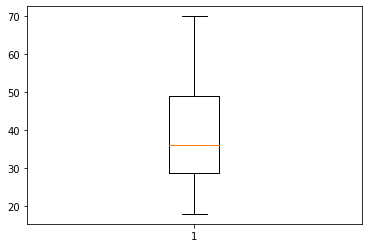

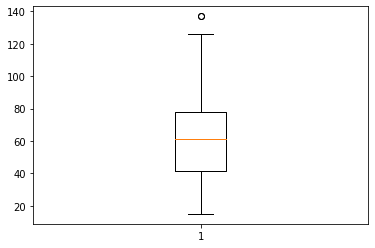

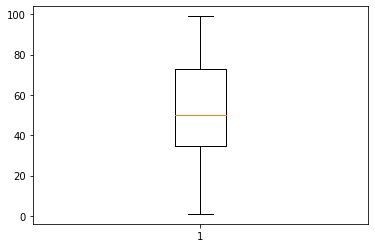

In [16]:
for i in df:
    if df[i].dtype != object:
        plt.boxplot(df[i])
        plt.show()


In [17]:
for i in df:
    if df[i].dtype != 'object':
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3-q1
        upper = q3+1.5*iqr
        lower = q1-1.5*iqr
        df[i] = np.where(df[i] > upper, upper, df[i])
        df[i] = np.where(df[i] < lower, lower, df[i])


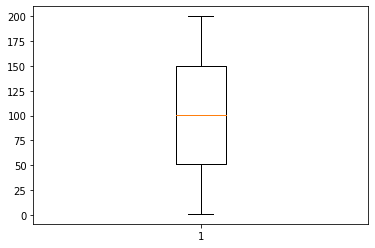

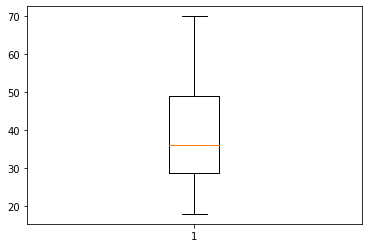

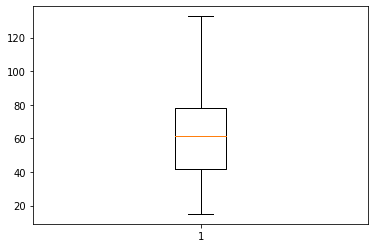

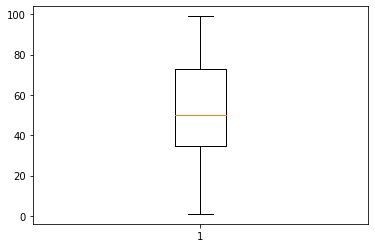

In [18]:
for i in df:
    if df[i].dtype == 'int64' or df[i].dtypes == 'float64':
        plt.boxplot(df[i])
        plt.show()


In [19]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.0,15.0,39.0
1,2.0,Male,21.0,15.0,81.0
2,3.0,Female,20.0,16.0,6.0
3,4.0,Female,23.0,16.0,77.0
4,5.0,Female,31.0,17.0,40.0


#### 7. Check for Categorical columns and perform encoding.

In [20]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,1,19.0,15.0,39.0
1,2.0,1,21.0,15.0,81.0
2,3.0,0,20.0,16.0,6.0
3,4.0,0,23.0,16.0,77.0
4,5.0,0,31.0,17.0,40.0


#### 8. Scaling the data

In [21]:
df = df.drop('CustomerID', axis=1)
x = df
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19.0,15.0,39.0
1,1,21.0,15.0,81.0
2,0,20.0,16.0,6.0
3,0,23.0,16.0,77.0
4,0,31.0,17.0,40.0


In [22]:
scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)


#### 9. Perform any of the clustering algorithms

In [23]:
error = []
for i in range(1, 11):
    kmeans = cluster.KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df)
    error.append(kmeans.inertia_)
error


[800.0000000000001,
 588.8027143528254,
 476.8873602319764,
 386.74906683579184,
 325.62444855679405,
 278.4169497617055,
 235.78300516918603,
 199.7747167825598,
 176.49597500635295,
 151.34911220026675]

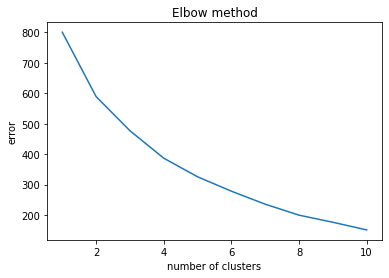

In [24]:
plt.plot(range(1, 11), error)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()


In [25]:
km_model = cluster.KMeans(n_clusters=4, init='k-means++', random_state=0)
km_model.fit(df)

KMeans(n_clusters=4, random_state=0)

In [26]:
y = km_model.predict(df)
y = pd.DataFrame(y, columns=['Cluster_Data'])
y.head(10)

,Cluster_Data
0,0
1,0
2,1
3,2
4,2
5,2
6,1
7,2
8,3
9,2


In [27]:
x.head(10)


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19.0,15.0,39.0
1,1,21.0,15.0,81.0
2,0,20.0,16.0,6.0
3,0,23.0,16.0,77.0
4,0,31.0,17.0,40.0
5,0,22.0,17.0,76.0
6,0,35.0,18.0,6.0
7,0,23.0,18.0,94.0
8,1,64.0,19.0,3.0
9,0,30.0,19.0,72.0


#### 12. Split the data into training and testing

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)


#### 11. Build the Model 
#### 12. Train the Model
#### 13. Test the Model

In [29]:
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

#### 14. Measure the performance using Evaluation Metrics.

In [30]:
print("Precision Metrics for Logistic Regression")
print("mean_squared_error = ", mean_squared_error(Y_test, Y_pred)**0.5)
print("mean_absolute_error = ", mean_absolute_error(Y_test, Y_pred))


Precision Metrics for Logistic Regression
mean_squared_error =  0.0
mean_absolute_error =  0.0
